# Intro
In the Name of Allah

Sentiment analysis is a technique through which you can analyze a piece of text to determine the sentiment behind it. In this notebook, we're going to train a Naïve Bayes Classifier for the task of sentiment analysis on Imdb movie reviews dataset.

**Please pay attention to these notes:**

<br/>

- **Assignment Due:** 1401/09/20 23:59
- Write your code in the cells denoted by:
```
######## Your Code Here ########
```
- You can add more cells if necessary
- Finding any sort of copying will zero down your grade.
- When your solution is ready to submit, don't forget to set the name of this notebook like  "Name_StudentID.ipynb".
- If you have any questions about this assignment, feel free to drop us a line. You can also ask your questions on the telegram group.
- You must run this notebook on Google Colab platform.

<br/>



# Libraries

In [1]:
# importing the libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')
import string
from nltk.stem import WordNetLemmatizer
import collections
from collections import Counter
from sklearn.model_selection import train_test_split as tts

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
!wget https://raw.githubusercontent.com/Ankit152/IMDB-sentiment-analysis/master/IMDB-Dataset.csv

--2022-12-13 22:55:51--  https://raw.githubusercontent.com/Ankit152/IMDB-sentiment-analysis/master/IMDB-Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66212309 (63M) [text/plain]
Saving to: ‘IMDB-Dataset.csv’

IMDB-Dataset.csv    100%[===================>]  63.14M  94.4MB/s    in 0.7s    

2022-12-13 22:55:52 (94.4 MB/s) - ‘IMDB-Dataset.csv’ saved [66212309/66212309]



# Load data

In [3]:
######## Your Code Here ########
data = pd.read_csv('IMDB-Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Preprocess
The first step of NLP is text preprocessing. Data cleaning is a very crucial step in any machine learning model, but more so for NLP. Without the cleaning process, the dataset is often a cluster of words that the computer doesn’t understand. Raw data over a properly or improperly formed sentence is not always desirable as it contains lot of unwanted components like null/html/links/url/emoji/stopwords etc. So in this step, this unwanted components are removed for better performance and accuracy.

In [4]:
######## Your Code Here ########
def preprocessing(data):
    lemmatizer = WordNetLemmatizer()
    
    # Lowercase
    data = data.lower()

    # Removing HTML tags
    data = re.sub(r"<.*?>", " ", data)

    # Removing hyperlinks
    data = re.sub(r"https?://\S+", "", data)

    # Removing numbers
    data = re.sub(r"\b[0-9]+\b\s*", "", data)

    # Removing punctuations
    data = re.sub(f"[{re.escape(string.punctuation)}]", "", data)

    # Spliting sentence to words
    words = data.split()

    # Applying word lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]

    # Removing stopwords
    words = [word for word in words if word not in stopwords.words('english') and '_' not in word]

    return words

In [5]:
data.review = data.review.apply(preprocessing)

<font size="5">Split the dataset</font>

Data splitting, or commonly known as train-test split, is the partitioning of data into subsets for model training and evaluation separately. Since the test set is not specified beforehand, we have to split the dataset into train and test set in an ideal proportion. 


In [6]:
######## Your Code Here ########
train_data, test_data = tts(data , test_size=0.2)

# Training
Use Naive Beyes algorithm to train a Language Model

In [7]:
######## Your Code Here ########
def naive_bayes_training(data, classes):
    probability = dict()
    count = dict()

    for c in classes:
        # find out probability of each class
        probability[c] = dict()
        probability[c]['count'] = len(data[data['sentiment']==c])
        probability[c]['probability'] = probability[c]['count']/len(data)

        # prepare data for counting occurrence of each word
        reviews = data[data['sentiment'] == c]['review'].to_list()
        tokens = list()
        for review in reviews:
            tokens.extend(review)

        # find out number of occurrence of each word in a class
        count[c]= dict()
        count[c]['token_count'] =collections.Counter(tokens)
        count[c]['len'] = len(tokens)

        # find out number of unique tokens in our dataset
    v = len(set(list(count['positive']['token_count'].keys())+ list(count['negative']['token_count'].keys())))

        # using naive bayes with add-1 smoothing rule for calculating the probability P(word|c)
    for class_name in classes:
        for word, c in count[class_name]['token_count'].items():
            probability[class_name][word] = (c+1)/ (v + count[class_name]['len'])
    
    return probability, count, v 

In [8]:
classes = ['positive', 'negative']
model, count, v = naive_bayes_training(train_data, classes)

# Test
Now you need to run inference on your test set

In [9]:
######## Your Code Here ########
def naive_bayes_testing(model,count, v, X_test, classes):
    y_pred = list()
    for sample in X_test:
        p = dict()
        for class_name in classes:
            p[class_name] = np.log(model[class_name]['probability'])
            for word in sample:
                if word in model[class_name]:
                    p[class_name] += np.log(model[class_name][word])
                else:
                    p[class_name] += np.log(1 / (v + count[class_name]['len']))

        y_pred.append(max(p, key=p.get))
    return y_pred

In [10]:
y_pred = naive_bayes_testing(model, count, v, test_data.review, classes)
y_true = test_data.sentiment

# Evaluation
After training is finished, we need some metrics to evaluate the trained model on the test set. Here, you need to write code for utilizing the metrics bellow without the sklearn libraries!

In [11]:
######## Your Code Here ########
TP = sum(real == pred and real == 'positive' for real, pred in zip(y_true,y_pred))
TN = sum(real == pred and real == 'negative' for real, pred in zip(y_true,y_pred))
FP = sum(real != pred and pred == 'positive' for real, pred in zip(y_true,y_pred))
FN = sum(real != pred and pred == 'negative' for real, pred in zip(y_true,y_pred))

Precision

In [12]:
######## Your Code Here ########
p = {'positive' : TP/(TP+FN), 'negative': TN/(TN+FP)}
print(p)

{'positive': 0.8389780154486037, 'negative': 0.8881034134518279}


Recall

In [13]:
######## Your Code Here ########
r = {'positive' : TP/(TP+FP), 'negative': TN/(TN+FN)}
print(r)

{'positive': 0.8843423799582464, 'negative': 0.8439539347408829}


F-measure

In [14]:
######## Your Code Here ########
f= dict()
f['positive'] = 2*p['positive']*r['positive']/ (p['positive'] + r['positive'])
f['negative'] = 2*p['negative']*r['negative']/ (p['negative'] + r['negative'])
print(f)

{'positive': 0.8610631161703425, 'negative': 0.8654659974411966}


Confustion matrix

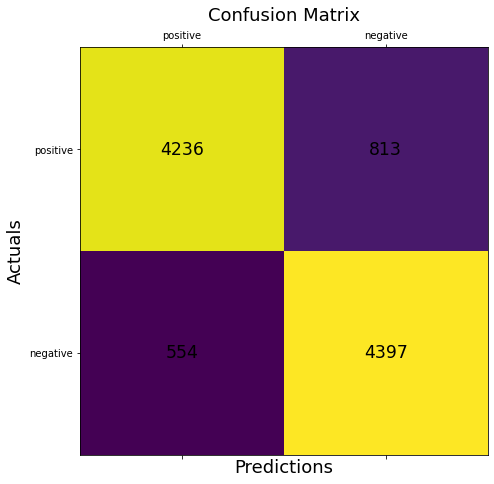

In [15]:
######## Your Code Here ########
import matplotlib.pyplot as plt
confusion_matrix = [[TP,FN],[FP,TN]]
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.matshow(confusion_matrix)
labels = ['positive', 'negative']
for i in range(2):
    for j in range(2):
        ax.text(x=j, y=i,s=confusion_matrix[i][j], va='center', ha='center', size='xx-large')

ax.set_xticklabels(['']+labels)
ax.set_yticklabels(['']+labels)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()